<a href="https://colab.research.google.com/github/21f3002439/DS-Intern-Assignment-Amit-Kumar-Pandey/blob/main/DS_Intern_Assignment_Amit_Kumar_Pandey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files
raw_data = files.upload()

Saving data.csv to data (1).csv


In [22]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [31]:
print(data.info())

print(data.describe())

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  15945 non-null  float64       
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

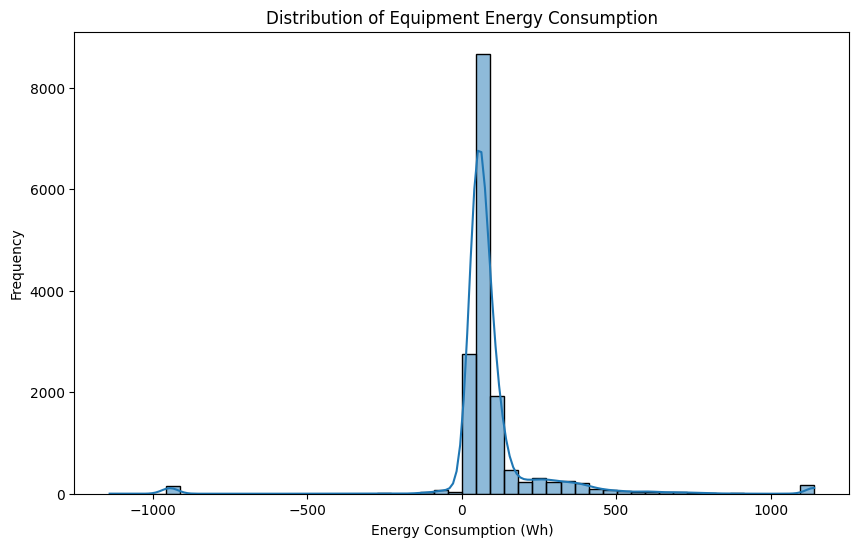

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['equipment_energy_consumption'].dropna(), bins=50, kde=True)
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

In [37]:
#Handling Non-Numeric and Invalid Target Values
# Convert target to numeric, coerce errors to NaN
data['equipment_energy_consumption'] = pd.to_numeric(data['equipment_energy_consumption'], errors='coerce')
data_clean = data.dropna(subset=['equipment_energy_consumption'])


In [39]:
#Handling Non-Numeric and Missing Feature Values
features_clean = data_clean.drop(columns=['timestamp', 'equipment_energy_consumption'])
features_clean = features_clean.apply(pd.to_numeric, errors='coerce')
data_clean = data_clean.loc[features_clean.dropna().index]
features_clean = features_clean.dropna()
target_clean = data_clean['equipment_energy_consumption']


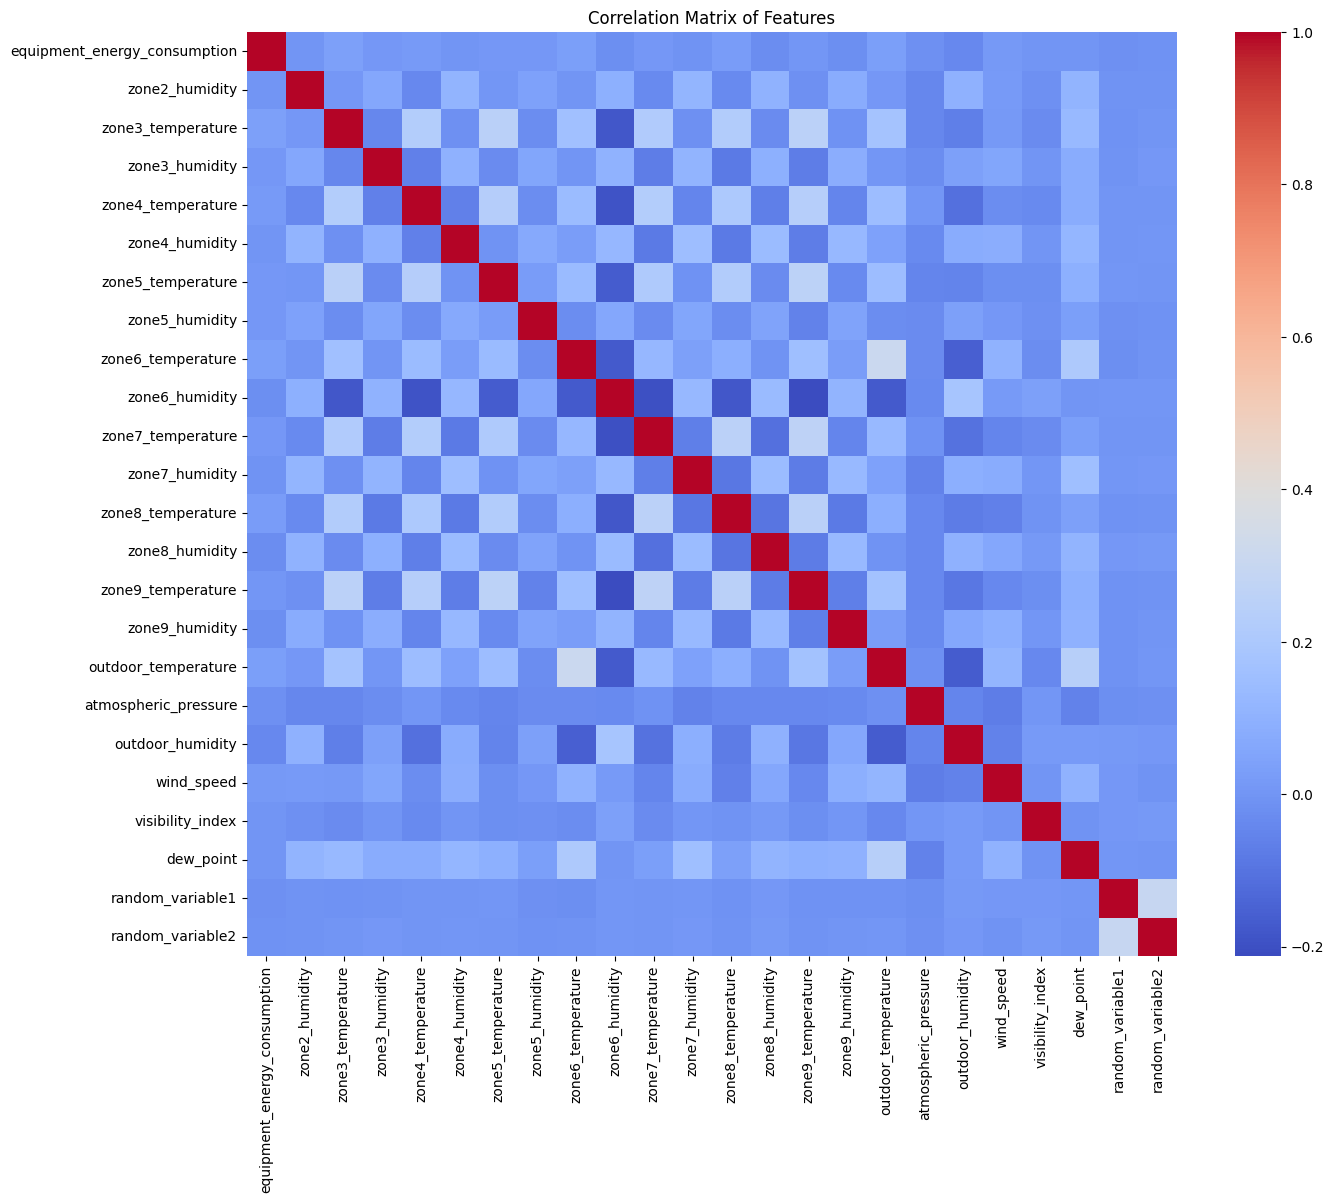

In [41]:
# Calculate correlation matrix only on numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()

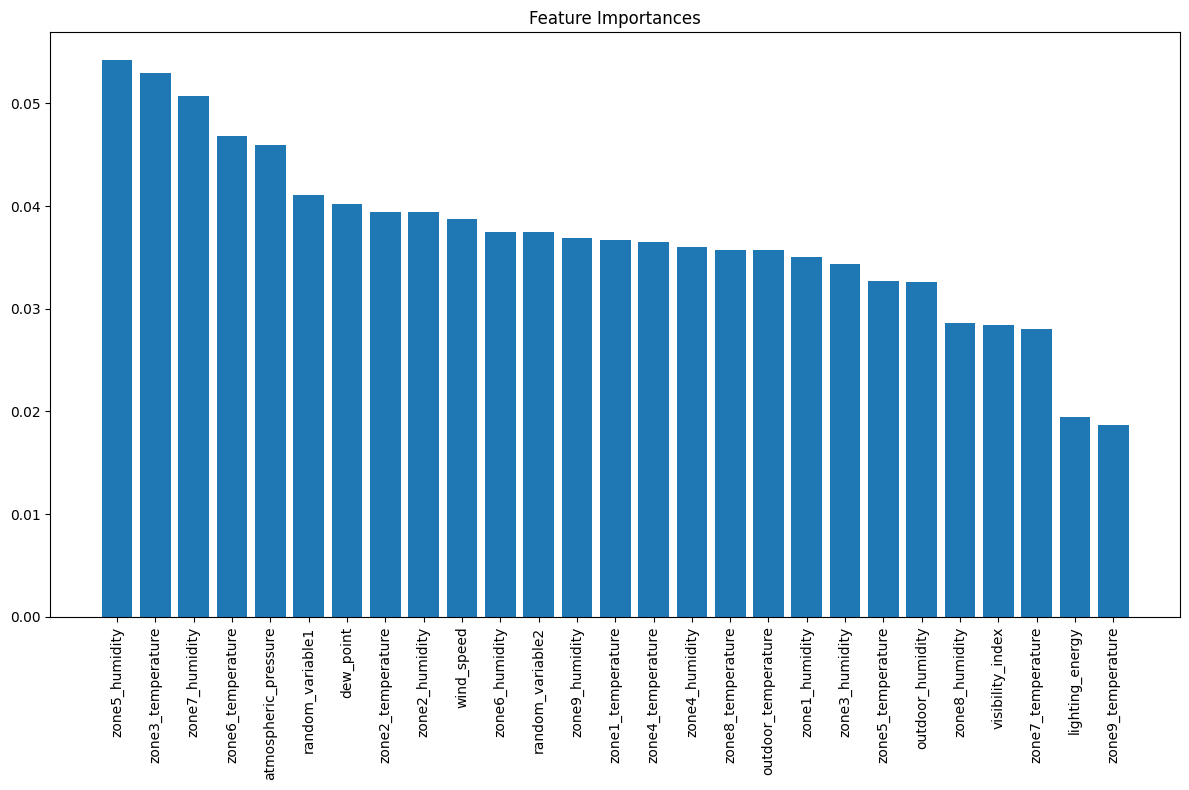

['zone5_humidity', 'zone3_temperature', 'zone7_humidity', 'zone6_temperature', 'atmospheric_pressure', 'random_variable1', 'dew_point', 'zone2_temperature', 'zone2_humidity', 'wind_speed']


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_clean, target_clean, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Feature importances
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features_clean.columns

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Top 10 features
important_features = feature_names[indices][:10].tolist()
print(important_features)
